In [1]:
import pandas as pd

In [2]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
excel_file = 'UN_MigrantStockTotal_2015.xlsx'#insert path here

In [4]:
#This function removes the header of the table
def removeTop(tbl):
    tbl.drop(tbl.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]],axis=0, inplace=True)
    return tbl

In [5]:
#This function removes Major Area and Region from the "Major area, region, country or area of destination" column.
def justCountries(tbl):
    tbl.set_index('Unnamed: 1',inplace = True)
    tbl.drop(index=["WORLD","Developed regions","Developing regions","Least developed countries","Less developed regions excluding least developed countries","Sub-Saharan Africa","Africa","Eastern Africa","Middle Africa","Northern Africa","Southern Africa","Western Africa","Asia","Central Asia","Eastern Asia","South-Eastern Asia","Southern Asia","Western Asia","Europe","Eastern Europe","Northern Europe","Southern Europe","Western Europe","Latin America and the Caribbean","Caribbean","Central America","South America","Northern America","Oceania","Australia and New Zealand","Melanesia","Micronesia","Polynesia"],inplace = True)
    tbl.reset_index(inplace=True)
    return tbl

In [6]:
#This function splits the sexYear column
def splitSexYear(tbl):
    tbl[['Sex','Year']]=tbl['sexYear'].str.split('_', expand=True)
    tbl.drop("sexYear",axis=1,inplace = True)
    return tbl

In [7]:
#Annex

#Clean Annex Table
annex = pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='ANNEX')
annex.columns=annex.iloc[13]
annex.drop(annex.index[[0,1,2,3,4,5,6,7,8,9,10,11,12,13]],axis=0, inplace=True)
annex.drop(['Sort order','Code'],axis=1, inplace=True)



In [8]:
#Table 1

int_migrant_stock = pd.read_excel(excel_file,sheet_name='Table 1')

#Step 1
removeTop(int_migrant_stock)

#Step 2
justCountries(int_migrant_stock)

#Step 3
colsNames = ['Country','Sort order','Notes','Country code','Type of data','Both sexes_1990','Both sexes_1995','Both sexes_2000','Both sexes_2005','Both sexes_2010','Both sexes_2015','M_1990','M_1995','M_2000','M_2005','M_2010','M_2015','F_1990','F_1995','F_2000','F_2005','F_2010','F_2015']
int_migrant_stock.columns = colsNames

int_migrant_stock = pd.melt(int_migrant_stock,id_vars=['Country','Sort order','Notes','Country code','Type of data'],var_name='sexYear',value_name='Stock')

#Step 4
splitSexYear(int_migrant_stock)

#Step 5
int_migrant_stock.drop(['Sort order', 'Notes','Type of data'],axis=1, inplace=True)


In [9]:
int_migrant_stock

Country Country code    Stock         Sex  Year
0                       Burundi          108   333110  Both sexes  1990
1                       Comoros          174    14079  Both sexes  1990
2                      Djibouti          262   122221  Both sexes  1990
3                       Eritrea          232    11848  Both sexes  1990
4                      Ethiopia          231  1155390  Both sexes  1990
...                         ...          ...      ...         ...   ...
4171                      Samoa          882   2460.0           F  2015
4172                    Tokelau          772    254.0           F  2015
4173                      Tonga          776   2604.0           F  2015
4174                     Tuvalu          798     63.0           F  2015
4175  Wallis and Futuna Islands          876   1411.0           F  2015

[4176 rows x 5 columns]

In [10]:
#Table 2

total_pop = pd.read_excel(excel_file,sheet_name='Table 2')

#Step 1
removeTop(total_pop)

#Step 2
justCountries(total_pop)

#Step 3
colsNames = ['Country','Sort order','Notes','Country code','Both sexes_1990','Both sexes_1995','Both sexes_2000','Both sexes_2005','Both sexes_2010','Both sexes_2015','M_1990','M_1995','M_2000','M_2005','M_2010','M_2015','F_1990','F_1995','F_2000','F_2005','F_2010','F_2015']
total_pop.columns = colsNames

total_pop = pd.melt(total_pop,id_vars=['Country','Sort order','Notes','Country code'],var_name='sexYear',value_name='Total Population (thousands)')

#Step 4
splitSexYear(total_pop)
#Step 5
total_pop.drop(['Sort order', 'Notes'],axis=1, inplace=True)


In [11]:
#Table 3

int_migrant_stock_percentage = pd.read_excel(excel_file,sheet_name='Table 3')

#Step 1
removeTop(int_migrant_stock_percentage)

#Step 2
justCountries(int_migrant_stock_percentage)

#Step 3
colsNames = ['Country','Sort order','Notes','Country code','Type of data','Both sexes_1990','Both sexes_1995','Both sexes_2000','Both sexes_2005','Both sexes_2010','Both sexes_2015','M_1990','M_1995','M_2000','M_2005','M_2010','M_2015','F_1990','F_1995','F_2000','F_2005','F_2010','F_2015']
int_migrant_stock_percentage.columns = colsNames

int_migrant_stock_percentage = pd.melt(int_migrant_stock_percentage,id_vars=['Country','Sort order','Notes','Country code','Type of data'],var_name='sexYear',value_name='Percentage')

#Step 4
splitSexYear(int_migrant_stock_percentage)

#Step 5
int_migrant_stock_percentage.drop(['Sort order','Notes','Type of data'],axis=1, inplace=True)

In [12]:
#Table 4

female_migrants_percentage = pd.read_excel(excel_file,sheet_name='Table 4')

#Step 1
removeTop(female_migrants_percentage)

#Step 2
justCountries(female_migrants_percentage)

#Step 3
colsNames = ['Country','Sort order','Notes','Country code','Type of data','F_1990','F_1995','F_2000','F_2005','F_2010','F_2015']
female_migrants_percentage.columns = colsNames

female_migrants_percentage = pd.melt(female_migrants_percentage,id_vars=['Country','Sort order','Notes','Country code','Type of data'],var_name='sexYear',value_name='Percentage')

#Step 4
splitSexYear(female_migrants_percentage)

#Step 5
female_migrants_percentage.drop(['Sort order','Notes','Type of data'],axis=1, inplace=True)

In [13]:
#Table 5

annual_rate_of_change = pd.read_excel('UN_MigrantStockTotal_2015.xlsx',sheet_name='Table 5')

#Step 1
removeTop(annual_rate_of_change)

#Step 2
justCountries(annual_rate_of_change)

#Step 3
colsNames = ['Country','Sort order','Notes','Country code','Type of data','Both sexes_1990-1995','Both sexes_1995-2000','Both sexes_2000-2005','Both sexes_2005-2010','Both sexes_2010-2015','M_1990-1995','M_1995-2000','M_2000-2005','M_2005-2010','M_2010-2015','F_1990-1995','F_1995-2000','F_2000-2005','F_2005-2010','F_2010-2015']
annual_rate_of_change.columns = colsNames

annual_rate_of_change = pd.melt(annual_rate_of_change,id_vars=['Country','Sort order','Notes','Country code','Type of data'],var_name='sexYear',value_name='Rate of Change')

#Step 4
splitSexYear(annual_rate_of_change)

#Step 5
annual_rate_of_change.drop(['Sort order','Notes','Type of data'],axis=1, inplace=True)

In [14]:
#Table 6

#Estimated refugee stock at mid-year (both sexes)
Table6 = pd.read_excel(excel_file,sheet_name='Table 6')

#Step 1
removeTop(Table6)

#Step 2
justCountries(Table6)

#Estimated refugee stock at mid-year (both sexes)
refugee_stock_estimate = pd.DataFrame(Table6)

refugee_stock_estimate.drop(['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],axis=1,inplace = True)

colsNames = ['Country','Sort order','Notes','Country code','Type of data','1990','1995','2000','2005','2010','2015']
refugee_stock_estimate.columns = colsNames

refugee_stock_estimate = pd.melt(refugee_stock_estimate,id_vars=['Country','Sort order','Notes','Country code','Type of data'],var_name='Year',value_name='Refugee Stock')

#Refugees as a percentage of the international migrant stock

refugees_percent = pd.DataFrame(Table6)

refugees_percent.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10','Unnamed: 17','Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21'],axis=1,inplace = True)

colsNames = ['Country','Sort order','Notes','Country code','Type of data','1990','1995','2000','2005','2010','2015']
refugees_percent.columns = colsNames

refugees_percent = pd.melt(refugees_percent,id_vars=['Country','Sort order','Notes','Country code','Type of data'],var_name='Year',value_name='Refugee Percent')

#Annual rate of change of the refugee stock

refugees_rate_of_change = pd.DataFrame(Table6)

refugees_rate_of_change.drop(['Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       'Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'],axis=1,inplace = True)

colsNames = ['Country','Sort order','Notes','Country code','Type of data','1990-1995','1995-2000','2000-2005','2005-2010','2010-2015']
refugees_rate_of_change.columns = colsNames

refugees_rate_of_change = pd.melt(refugees_rate_of_change,id_vars=['Country','Sort order','Notes','Country code','Type of data'],var_name='Year',value_name='Refugees Rate of Change')
refugees_rate_of_change.replace(to_replace='..', value='NaN', inplace = True)

#Step 5
refugee_stock_estimate.drop(['Sort order','Notes','Type of data'],axis=1, inplace=True)
refugees_percent.drop(['Sort order','Notes','Type of data'],axis=1, inplace=True)
refugees_rate_of_change.drop(['Sort order','Notes','Type of data'],axis=1, inplace=True)

In [15]:
#Final Project

In [16]:
#Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

Text(0.5, 1.0, 'Migrant Stock')

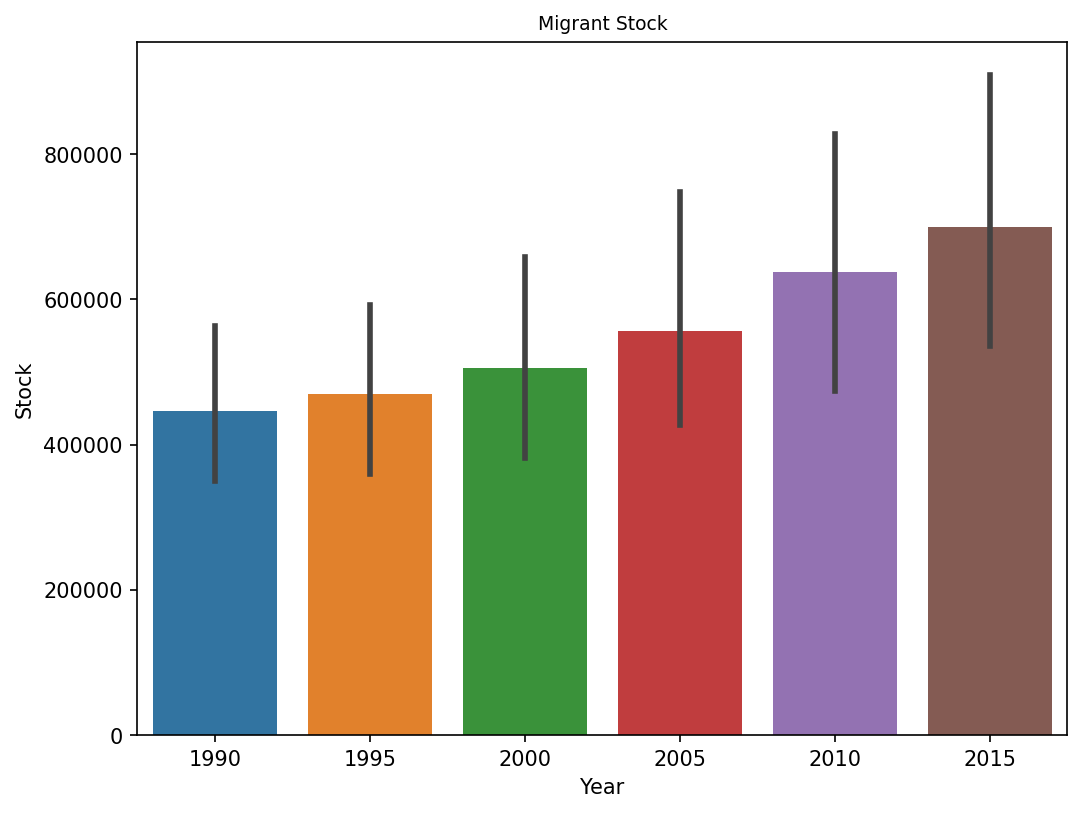

In [53]:

int_migrant_stock = int_migrant_stock[int_migrant_stock['Stock'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
int_migrant_stock=int_migrant_stock.convert_dtypes()





plt.figure(figsize=(8,6),dpi=150)
sns.barplot(data=int_migrant_stock,x='Year',y='Stock')
plt.title('Migrant Stock',fontsize=9)

In [45]:
refugee_stock_estimate = refugee_stock_estimate[refugee_stock_estimate['Refugee Stock'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
refugee_stock_estimate=refugee_stock_estimate.convert_dtypes()


<AxesSubplot:xlabel='Year', ylabel='Refugee Stock'>

Text(0.5, 1.0, 'Refugee Stock Estimate')

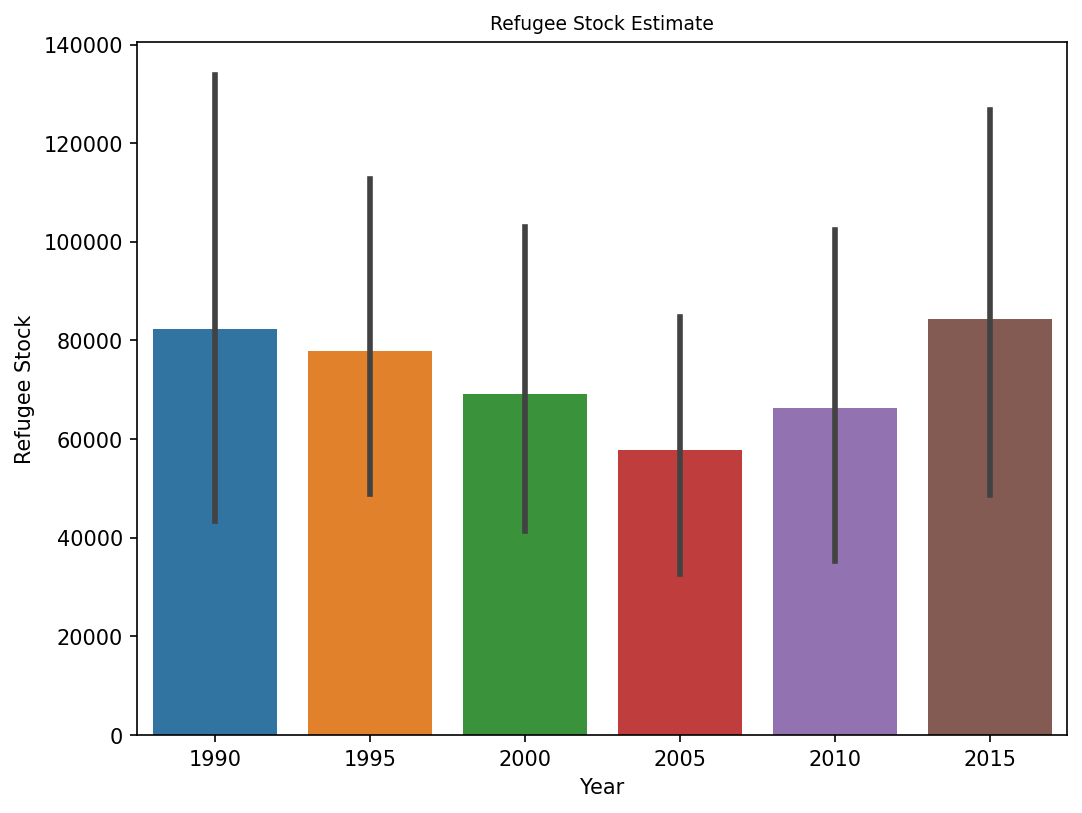

In [52]:
plt.figure(figsize=(8,6),dpi=150)
sns.barplot(data=refugee_stock_estimate,x='Year',y='Refugee Stock')
plt.title('Refugee Stock Estimate',fontsize=9)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Refugee Stock Estimate')

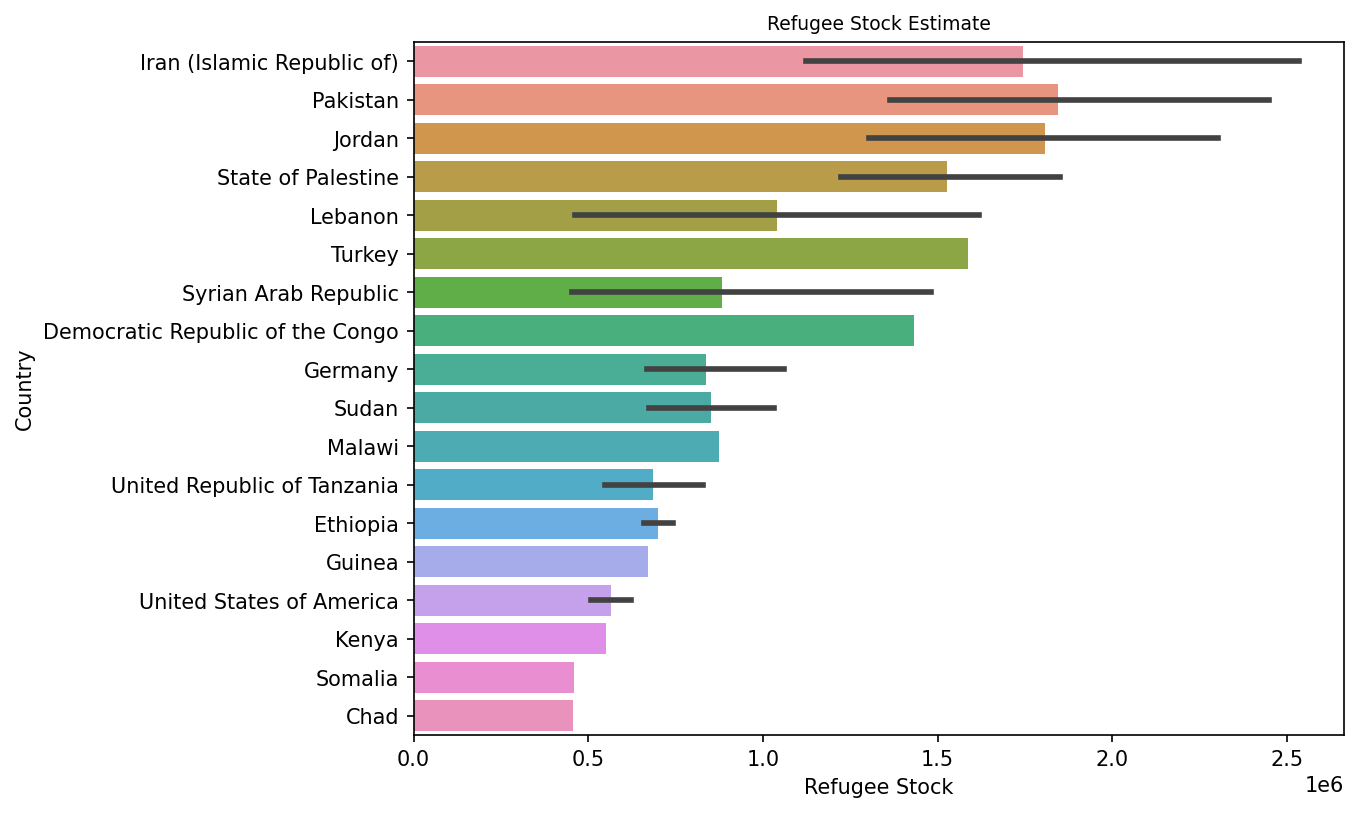

In [54]:

top_refugge_countries=refugee_stock_estimate.sort_values(by=['Refugee Stock'],ascending=False).head(50)

plt.figure(figsize=(8,6),dpi=150)
sns.barplot(data=top_refugge_countries,x='Refugee Stock',y='Country')
plt.title('Refugee Stock Estimate',fontsize=9)

In [57]:
top_migrant_countries=int_migrant_stock.sort_values(by=['Stock'],ascending=False).head(50)

plt.figure(figsize=(8,6),dpi=150)
sns.barplot(data=top_migrant_countries,x='Stock',y='Country')
plt.title('Migrant Stock',fontsize=9)

Text(0.5, 1.0, 'Migrant Stock')

In [21]:
int_migrant_stock['Year'] = int_migrant_stock['Year'].astype(int)
int_migrant_stock.dtypes

Country         string
Country code     Int64
Stock            Int64
Sex             string
Year             int64
dtype: object